In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor #model drzewo decyzyjne
from sklearn.metrics import mean_absolute_error #"fukcja - w jaki sposób mierzymy sukces - średnia arytmetyczna odchyleń"
from sklearn.model_selection import cross_val_score

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data

men_shoes.csv


In [0]:
df=pd.read_csv('data/men_shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price=np.mean(df['prices_amountmin']) # obliczmy średbą kolumnę którą pognozujemy
mean_price

93.53952188183217

In [0]:
y_true=df['prices_amountmin']
y_pred=[mean_price] * y_true.shape[0] #wartosc która chcemy sprognozowac

mean_absolute_error(y_true,y_pred)

63.968341227870624

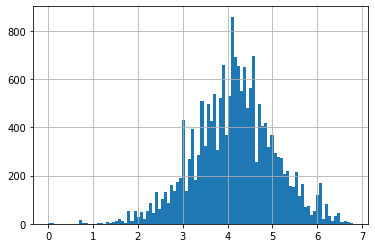

In [0]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [0]:
y_true=df['prices_amountmin']
y_pred=[np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [0]:
y_true=df['prices_amountmin']
price_log_min=np.expm1(np.mean(np.log1p(y_true))) # logarytmujemy, bierzemy średnią a potem pierwiastkujemy wracając do liczby 
y_pred=[price_log_min] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df['brand_cat']=df['brand'].factorize()[0] # zero na końcu mówi że dostajemy id

In [0]:
feats=['brand_cat'] #lista cech
X=df[feats].values #macierz 
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)

scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X=df[ feats ].values
  y=df['prices_amountmin'].values

  model=DecisionTreeRegressor(max_depth=5)

  scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df.columns
df.manufacturer.value_counts()

Puma              476
Nike              374
New Balance       249
VANS              170
Reebok            128
                 ... 
Alpinestars         1
Ridge Footwear      1
C1RCA               1
AGS Footwear        1
MF Western          1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat']=df['manufacturer'].factorize()[0] # zero na końcu mówi że dostajemy id

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['manufacturer_cat','brand_cat'])

(-58.539304199085976, 4.311223231615431)

In [59]:
ls matrix_one

day3.ipynb  day4.ipynb


In [0]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
